<a href="https://colab.research.google.com/github/andremarinho17/data_projects/blob/master/Crime_Analysis_in_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crime Analysis in Rio de Janeiro

**Author**: André Marinho


Crime in Brazil has been on the rise. According to the G1, a brazilian portal, after two years of decline, violence has risen again in the country, registering a 5% increase in murders in 2020, a year marked by the COVID-19 pandemic. This growth is affecting several cities. A study carried out by the brazilian Portal da Violência (Violence Portal) for 2020 concluded that the states with the highest number of violent crimes are Bahia (5,276), Ceará (4,039), Pernambuco (3,759) and Rio de Janeiro (3,653) respectively.

With the current laws on access to information and the awareness of public bodies, it is possible to access data, carry out studies and gain a deeper understanding of various phenomena in society, including crime. A great example is the government of Rio de Janeiro, which has launched the ISPDados, a brazilian portal.

This project aims to carry out a study of crime in Rio de Janeiro, by extracting and analyzing relevant statistical information about violence in the marvelous city.


<p align="center"><img alt="Rio de Janeiro" width="70%" src="https://raw.githubusercontent.com/andremarinho17/imagens/main/cropped-Rio-de-Janeiro-at-Night.jpg"></p>



## Data Gathering

The data was obtained directly from the ISPDados portal, the Public Security Institute's Open Data page. The portal provides access to data sources containing criminal records and police activity in Rio de Janeiro.

According to the portal, the statistics are based on the Occurrence Records (RO) drawn up at the police stations of the Rio de Janeiro State Civil Police Secretariat (SEPOL), as well as complementary information provided by the Rio de Janeiro State Military Police Secretariat (SEPM). Occurrence records are subjected to quality control by the General Police Internal Affairs (CGPOL) of the State Civil Police Secretariat and then consolidated by the ISP. The statistics produced are based on the date the police record was made.

### Importing the data

In [2]:
# installing some necessary tools
!pip install pywaffle -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 8.5 MB/s eta 0:00:00


In [3]:
# importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from pywaffle import Waffle

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,...,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,...,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,...,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,...,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,...,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


As it can be seen, the variables are in brazilian portuguese. In the next steps, I'll translate them in order to make the analysis readable for English language natives.

In [6]:
column_mapping = {
    "vano": "year",
    "mes": "month",
    "hom_doloso": "intentional_homicide",
    "lesao_corp_morte": "bodily_injury_resulting_in_death",
    "latrocinio": "robbery_resulting_in_death",
    "hom_por_interv_policial": "homicides_by_police_intervention",
    "tentat_hom": "attempted_homicide",
    "lesao_corp_dolosa": "intentional_bodily_injury",
    "estupro": "rape",
    "hom_culposo": "involuntary_homicide",
    "lesao_corp_culposa": "involuntary_bodily_injury",
    "roubo_comercio": "robbery_commerce",
    "roubo_residencia": "robbery_residence",
    "roubo_veiculo": "robbery_vehicle",
    "roubo_carga": "robbery_cargo",
    "roubo_transeunte": "robbery_pedestrian",
    "roubo_em_coletivo": "robbery_public_transport",
    "roubo_banco": "robbery_bank",
    "roubo_cx_eletronico": "robbery_atm",
    "roubo_celular": "robbery_mobile_phone",
    "roubo_conducao_saque": "robbery_leading_to_withdrawal",
    "roubo_apos_saque": "robbery_after_withdrawal",
    "roubo_bicicleta": "robbery_bicycle",
    "outros_roubos": "other_robberies",
    "total_roubos": "total_robberies",
    "furto_veiculos": "theft_vehicle",
    "furto_transeunte": "theft_pedestrian",
    "furto_coletivo": "theft_public_transport",
    "furto_celular": "theft_mobile_phone",
    "furto_bicicleta": "theft_bicycle",
    "outros_furtos": "other_thefts",
    "total_furtos": "total_thefts",
    "sequestro": "kidnapping",
    "extorsao": "extortion",
    "sequestro_relampago": "express_kidnapping",
    "estelionato": "fraud",
    "apreensao_drogas": "drug_seizure",
    "posse_drogas": "drug_possession",
    "trafico_drogas": "drug_trafficking",
    "apreensao_drogas_sem_autor": "drug_seizure_no_suspect",
    "recuperacao_veiculos": "vehicle_recovery",
    "apf": "arrest_in_flagrante_delicto",
    "aaapai": "apprehension_of_minor_for_illegal_act",
    "cmp": "arrest_warrant_execution",
    "cmba": "search_and_seizure_execution",
    "ameaca": "threat",
    "pessoas_desaparecidas": "missing_persons",
    "encontro_cadaver": "found_cadavers",
    "encontro_ossada": "found_human_remains",
    "pol_militares_mortos_serv": "military_police_killed_on_duty",
    "pol_civis_mortos_serv": "civil_police_killed_on_duty",
    "indicador_letalidade": "lethality_indicator",
    "indicador_roubo_rua": "street_robbery_indicator",
    "indicador_roubo_veic": "vehicle_robbery_indicator",
    "registro_ocorrencias": "total_occurrences",
    "fase": "operation_phase"
}

In [7]:
def rename_columns(df):
    """
    Renames the columns of the given DataFrame based on the provided mapping.

    Parameters:
        df (pd.DataFrame): The DataFrame to rename.

    Returns:
        pd.DataFrame: The DataFrame with renamed columns.
    """
    df.rename(columns=column_mapping, inplace=True)
    return df

In [9]:
df = rename_columns(df)

df.head()

,year,month,intentional_homicide,bodily_injury_resulting_in_death,robbery_resulting_in_death,homicides_by_police_intervention,attempted_homicide,intentional_bodily_injury,rape,involuntary_homicide,...,missing_persons,found_cadavers,found_human_remains,military_police_killed_on_duty,civil_police_killed_on_duty,lethality_indicator,street_robbery_indicator,vehicle_robbery_indicator,total_occurrences,operation_phase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,...,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,...,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,...,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,...,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,...,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


## Initial Data Analysis

In order to understand the dataset under study, I'm going to extract some information about it, such as dimensions, columns, types of variables, etc. First, I'll check the dataset's dimensions.

In [10]:
# dimensions verification
print("Variables: ", df.shape[1])
print("Entries: ", df.shape[0])

Variables:  56
Entries:  344


Knowing the dimensions of the dataset, we now need to understand the variables in it. To do this, I'm going to print out the names of the columns.

In [11]:
# columns verification

df.columns

Index(['year', 'month', 'intentional_homicide',
       'bodily_injury_resulting_in_death', 'robbery_resulting_in_death',
       'homicides_by_police_intervention', 'attempted_homicide',
       'intentional_bodily_injury', 'rape', 'involuntary_homicide',
       'involuntary_bodily_injury', 'robbery_commerce', 'robbery_residence',
       'robbery_vehicle', 'robbery_cargo', 'robbery_pedestrian',
       'robbery_public_transport', 'robbery_bank', 'robbery_atm',
       'robbery_mobile_phone', 'robbery_leading_to_withdrawal',
       'robbery_after_withdrawal', 'robbery_bicycle', 'other_robberies',
       'total_robberies', 'theft_vehicle', 'theft_pedestrian',
       'theft_public_transport', 'theft_mobile_phone', 'theft_bicycle',
       'other_thefts', 'total_thefts', 'kidnapping', 'extortion',
       'express_kidnapping', 'fraud', 'drug_seizure', 'drug_possession',
       'drug_trafficking', 'drug_seizure_no_suspect', 'vehicle_recovery',
       'arrest_in_flagrante_delicto', 'apprehension_o

The dataset is made up of several variables, ranging from the year of the crime in question, the month and the types of related crimes. In addition, it is necessary to check the type of these variables for a better understanding. This type of information helps in the data cleaning process.

In [12]:
# data type verification
df.dtypes

,0
year,int64
month,int64
intentional_homicide,int64
bodily_injury_resulting_in_death,float64
robbery_resulting_in_death,int64
homicides_by_police_intervention,float64
attempted_homicide,int64
intentional_bodily_injury,int64
rape,float64
involuntary_homicide,float64


The dataset is mostly made up of integer and float variables. Below is the dictionary of variables.

**Data Dictionary**
* year: Year of Record  
* month: Month of Record  
* intentional_homicide: Records of Intentional Homicide  
* bodily_injury_resulting_in_death: Records of Bodily Injury Resulting in Death  
* robbery_resulting_in_death: Records of Robbery Resulting in Death  
* homicides_by_police_intervention: Records of Homicides by Police Intervention  
* attempted_homicide: Records of Attempted Homicides  
* aggravated_bodily_injury: Records of Aggravated Bodily Injury  
* rape: Records of Rape Cases  
* negligent_homicide: Records of Negligent Homicide  
* negligent_bodily_injury: Records of Negligent Bodily Injury  
* commercial_robbery: Records of Commercial Robberies  
* residential_robbery: Records of Residential Robberies  
* vehicle_robbery: Records of Vehicle Robberies  
* cargo_robbery: Records of Cargo Robberies  
* pedestrian_robbery: Records of Pedestrian Robberies  
* public_transport_robbery: Records of Public Transport Robberies  
* bank_robbery: Records of Bank Robberies  
* atm_robbery: Records of ATM Robberies  
* cellphone_robbery: Records of Cellphone Robberies  
* robbery_with_forced_cash_withdrawal: Records of Robberies Leading to Forced Cash Withdrawal  
* robbery_after_withdrawal: Records of Robberies After Cash Withdrawals  
* bicycle_robbery: Records of Bicycle Robberies  
* other_robberies: Records of Other Robberies  
* total_robberies: Total Records of Robberies  
* vehicle_theft: Records of Vehicle Theft  
* pedestrian_theft: Records of Pedestrian Thefts  
* public_transport_theft: Records of Public Transport Thefts  
* cellphone_theft: Records of Cellphone Thefts  
* bicycle_theft: Records of Bicycle Thefts  
* other_thefts: Records of Other Thefts  
* total_thefts: Total Records of Thefts  
* kidnapping: Records of Kidnapping  
* extortion: Records of Extortion  
* express_kidnapping: Records of Express Kidnapping  
* fraud: Records of Fraud  
* drug_seizure: Records of Drug Seizures  
* drug_possession: Records of Drug Possession  
* drug_trafficking: Records of Drug Trafficking  
* drug_seizure_without_perpetrator: Records of Drug Seizures Without Perpetrators  
* vehicle_recovery: Records of Stolen or Recovered Vehicles  
* arrests_in_flagrante_delicto: Records of Arrests in Flagrante Delicto  
* juvenile_apprehension: Apprehension of Juveniles for Infractions  
* arrest_warrant_execution: Execution of Arrest Warrants  
* search_and_seizure_warrant_execution: Execution of Search and Seizure Warrants  
* threat: Records of Threats  
* missing_persons: Records of Missing Persons  
* cadaver_discovery: Records of Cadaver Discoveries  
* skeleton_discovery: Records of Skeleton Discoveries  
* police_officers_killed_on_duty: Records of Military Police Officers Killed on Duty  
* civil_police_officers_killed_on_duty: Records of Civil Police Officers Killed on Duty  
* lethality_indicator: Lethality Indicator  
* street_robbery_indicator: Street Robbery Indicator  
* vehicle_robbery_indicator: Vehicle Robbery Indicator  
* total_records: Total Number of Records Registered  
* operation_phase: Operation Phase (e.g., Phase 2: Consolidated without Errata, Phase 3: Consolidated with Errata)


Aware of the information related to dimension, columns and variable types, I will print the first five entries of the dataset to get an initial view of the set and also check the number of missing values.

In [13]:
df.head()

,year,month,intentional_homicide,bodily_injury_resulting_in_death,robbery_resulting_in_death,homicides_by_police_intervention,attempted_homicide,intentional_bodily_injury,rape,involuntary_homicide,...,missing_persons,found_cadavers,found_human_remains,military_police_killed_on_duty,civil_police_killed_on_duty,lethality_indicator,street_robbery_indicator,vehicle_robbery_indicator,total_occurrences,operation_phase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,...,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,...,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,...,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,...,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,...,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [14]:
# checking for missing values
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
theft_bicycle,0.802326
robbery_bicycle,0.802326
search_and_seizure_execution,0.523256
drug_possession,0.523256
drug_trafficking,0.523256
drug_seizure_no_suspect,0.523256
arrest_in_flagrante_delicto,0.523256
apprehension_of_minor_for_illegal_act,0.523256
arrest_warrant_execution,0.523256
theft_mobile_phone,0.418605


It can be seen that the variables related to robberies, bicycle thefts and drug seizures have a considerable percentage of missing values. However, the variables related to bicycles will not be included in the scope of this analysis.

As the data is structured over time, statistical analysis can be carried out from the period in which these crimes began to be recorded. In addition, it is possible to extract other relevant information about crimes by year and month and to categorize crimes (against life, property, etc.).

## Statistical Information on Crime in Rio de Janeiro

With knowledge of the data set, it is now possible to extract the relevant statistical information and carry out the study on crime in Rio de Janeiro. First, I'll check how the data is distributed, so it's possible to detect outliers, flaws in the distribution and infer hypotheses to carry out the correct cleaning.

In [15]:
#  checking the distribution of data
df.describe()

,year,month,intentional_homicide,bodily_injury_resulting_in_death,robbery_resulting_in_death,homicides_by_police_intervention,attempted_homicide,intentional_bodily_injury,rape,involuntary_homicide,...,missing_persons,found_cadavers,found_human_remains,military_police_killed_on_duty,civil_police_killed_on_duty,lethality_indicator,street_robbery_indicator,vehicle_robbery_indicator,total_occurrences,operation_phase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,...,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,...,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,...,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,...,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,...,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,...,427.000000,60.500000,3.000000,2.000000,0.00000,590.000000,4190.000000,2322.000000,54926.500000,3.000000
75%,2012.000000,9.000000,577.250000,6.000000,19.000000,96.25000,398.250000,6582.500000,441.250000,236.250000,...,481.500000,87.000000,4.000000,3.000000,1.00000,649.000000,6872.750000,2778.000000,63292.500000,3.000000
max,2019.000000,12.000000,831.000000,21.000000,36.000000,194.00000,645.000000,9050.000000,561.000000,449.000000,...,628.000000,217.000000,13.000000,10.000000,3.00000,848.000000,13833.000000,5358.000000,75403.000000,3.000000


To get a better view of the distribution, I'm going to plot the histogram of the variables.

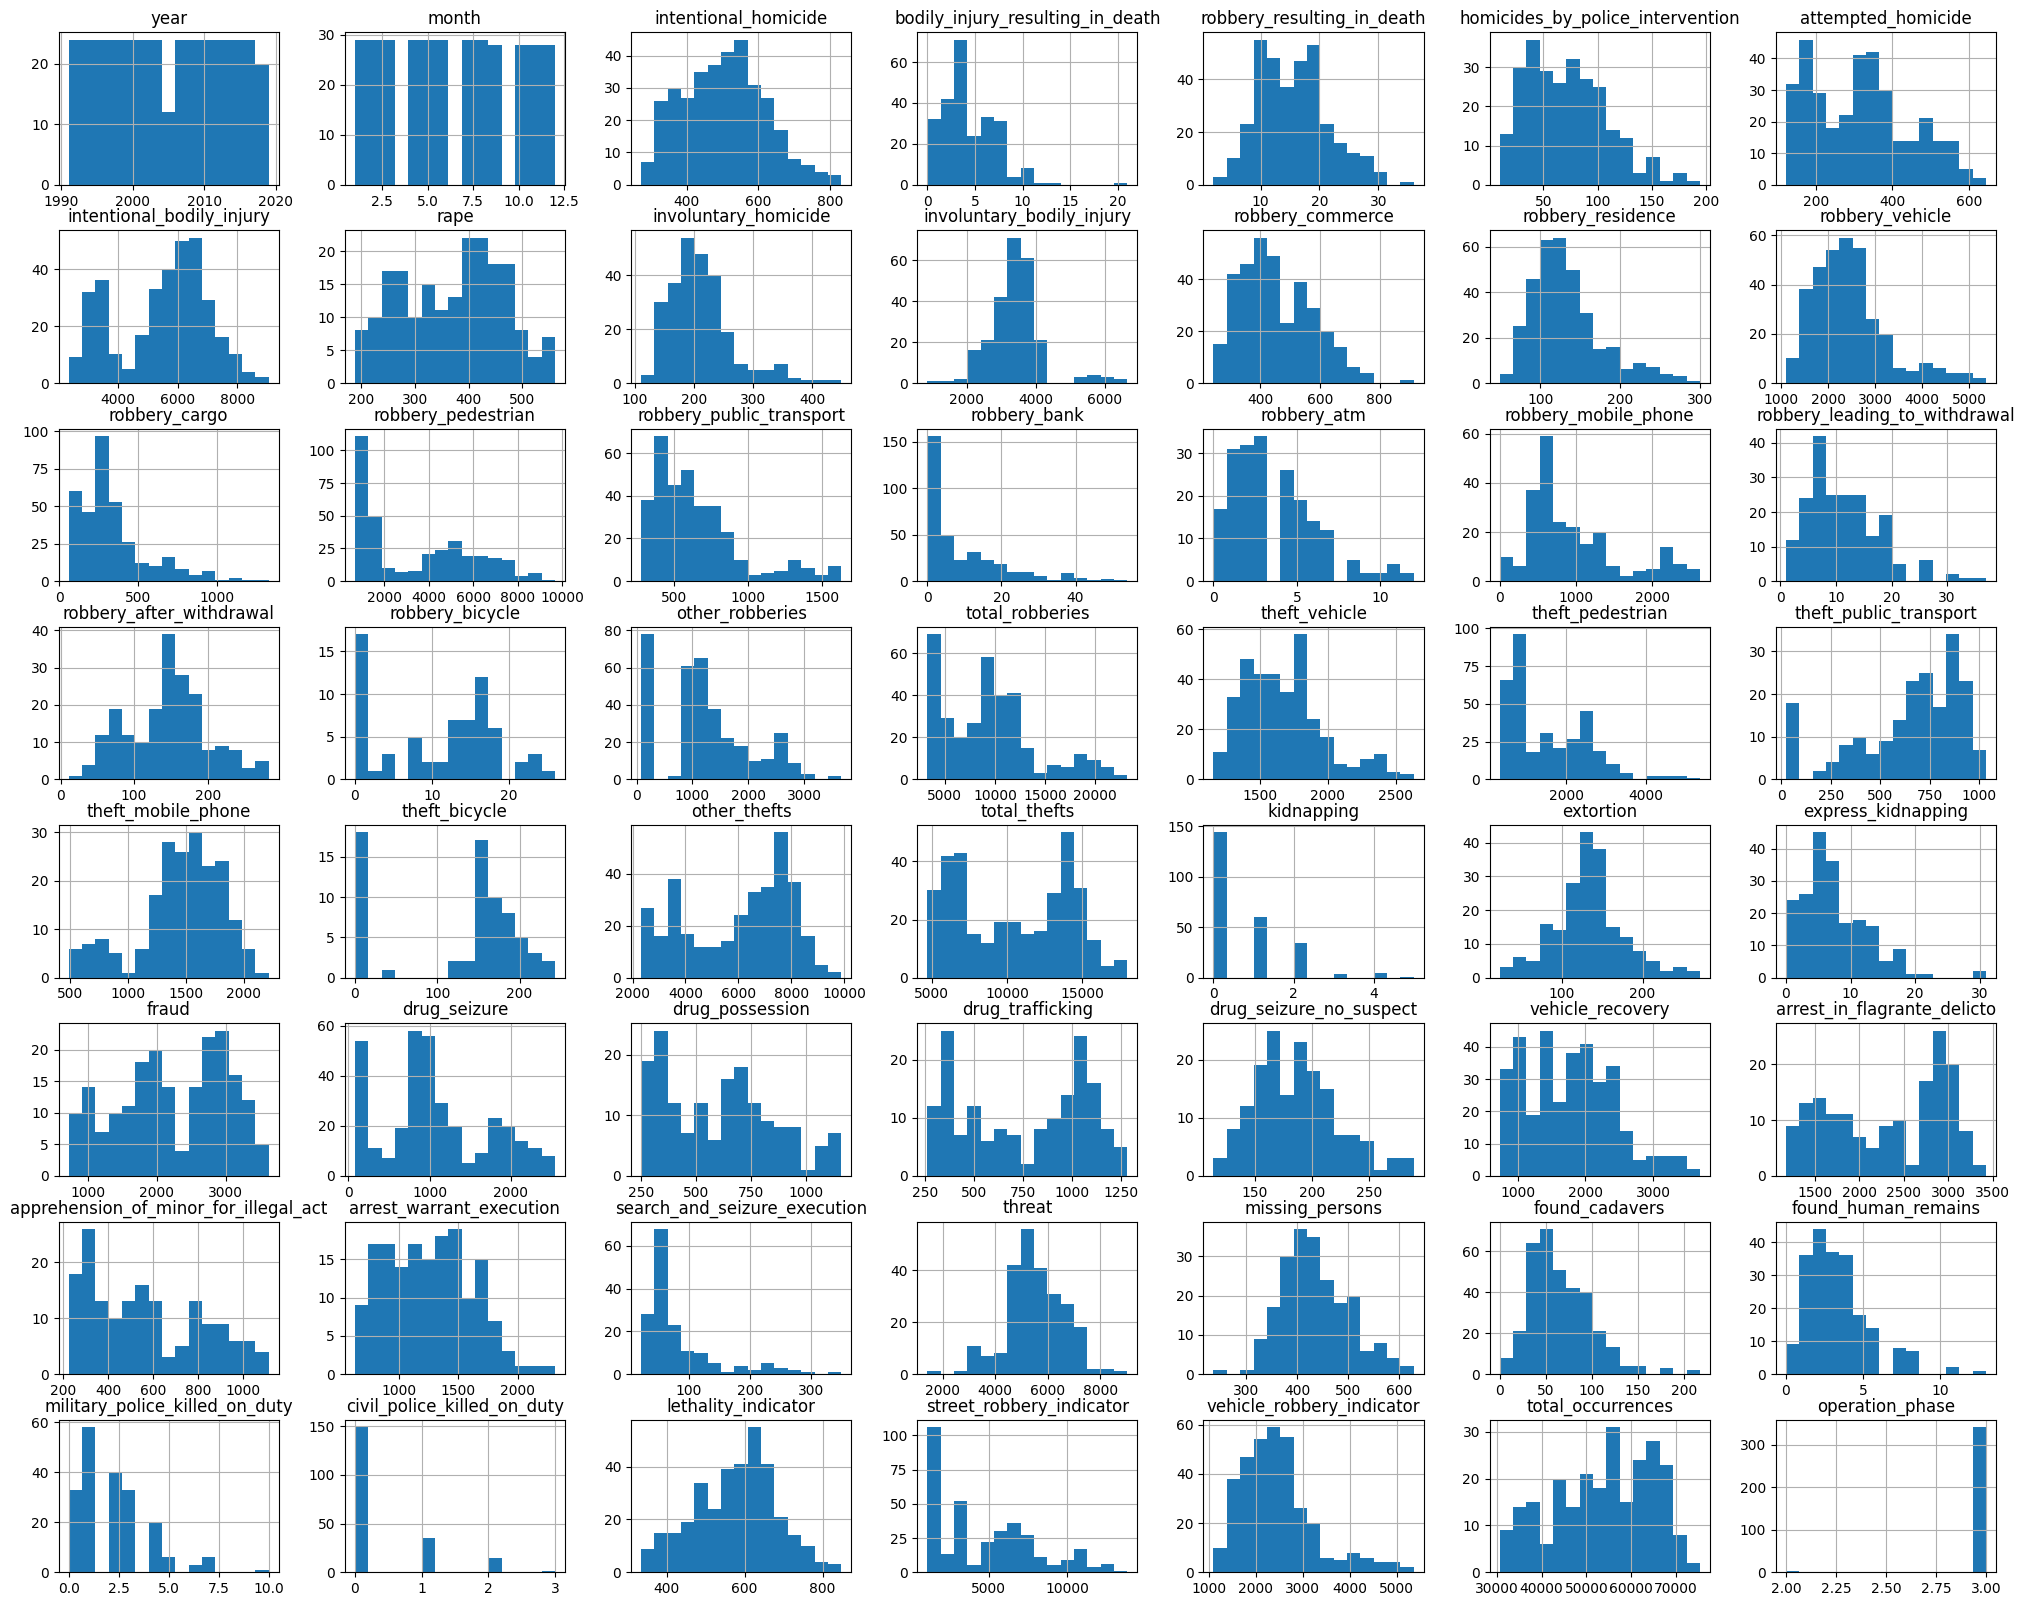

In [16]:
df.hist(bins=15, figsize=(25,20))
plt.show()

It can be seen that most of the variables are well distributed in the datasets. Some, such as injury_corp_death, injury_corp_family and bank_robbery, have outliers. However, these variables will not be studied in this project.

In the following sections, I will begin the statistical analysis of crimes against life and property.

### Crimes against Property - Vehicles

Crimes against property, such as embezzlement, theft and robbery - especially of vehicles - are very common in large cities in Brazil. In the data set, there are variables related to these types of crimes, which makes it possible to analyze and extract relevant information so that these types of crimes can be combated.

Next, I'll look at the average number of thefts and robberies of vehicles and, consequently, the average number of vehicles recovered.

In [17]:
df.columns

Index(['year', 'month', 'intentional_homicide',
       'bodily_injury_resulting_in_death', 'robbery_resulting_in_death',
       'homicides_by_police_intervention', 'attempted_homicide',
       'intentional_bodily_injury', 'rape', 'involuntary_homicide',
       'involuntary_bodily_injury', 'robbery_commerce', 'robbery_residence',
       'robbery_vehicle', 'robbery_cargo', 'robbery_pedestrian',
       'robbery_public_transport', 'robbery_bank', 'robbery_atm',
       'robbery_mobile_phone', 'robbery_leading_to_withdrawal',
       'robbery_after_withdrawal', 'robbery_bicycle', 'other_robberies',
       'total_robberies', 'theft_vehicle', 'theft_pedestrian',
       'theft_public_transport', 'theft_mobile_phone', 'theft_bicycle',
       'other_thefts', 'total_thefts', 'kidnapping', 'extortion',
       'express_kidnapping', 'fraud', 'drug_seizure', 'drug_possession',
       'drug_trafficking', 'drug_seizure_no_suspect', 'vehicle_recovery',
       'arrest_in_flagrante_delicto', 'apprehension_o

In [21]:
# Checking the average number of vehicles robbed
average_robbery = df.robbery_vehicle.mean()
print("Average of robbed vehicles: ", round(average_robbery, 2))

Average of robbed vehicles:  2448.7


In [22]:
# Checking the average number of vehicles stolen
average_theft = df.theft_vehicle.mean()
print("Average of stolen vehicles: ", round(average_theft, 2))

Average of theft vehicles:  1674.67


In [25]:
# Checking the average number of vehicles recovered
average_recovery = df.vehicle_recovery.mean()
print("Average of vehicles recovered: ", round(average_recovery, 2))

Average of vehicles recovered:  1772.24


As it can be seen, Rio de Janeiro has an overall average of approximately 2448 stolen vehicles and 1674 stolen vehicles, while the average number of vehicles recovered is approximately 1772.

Next, I'll look at how much people manage to recover their vehicles by calculating the percentage.

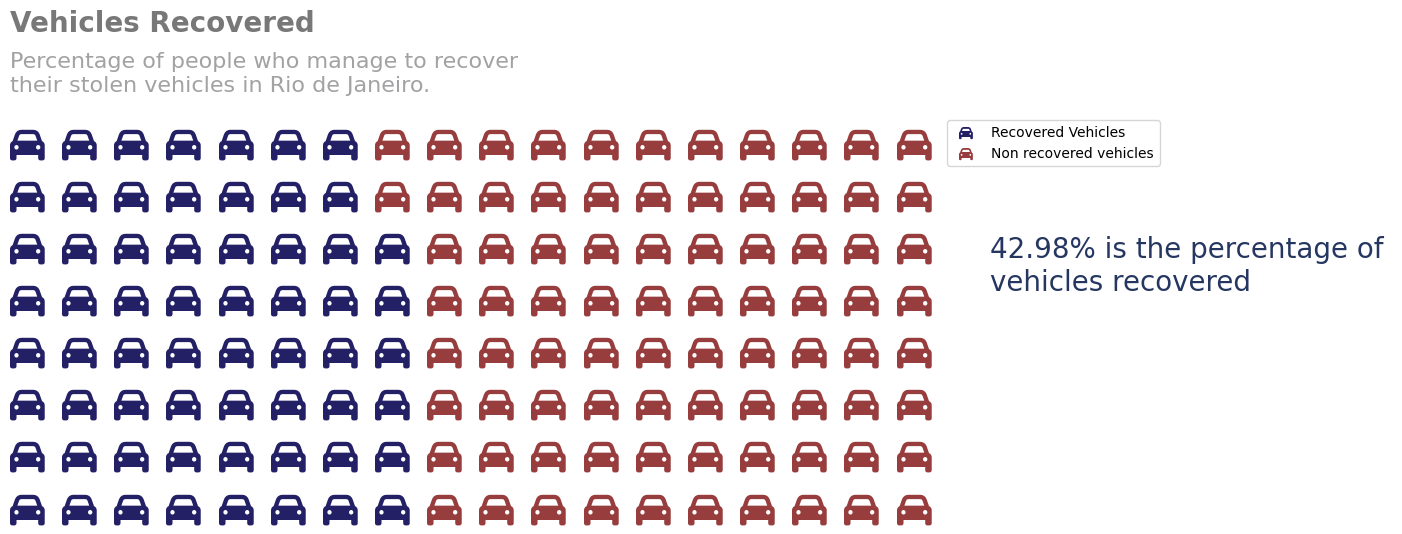

In [27]:
# Total of vehicles lost
total = average_robbery + average_theft

# Percentual de veículos recuperados
recovery_percentage = average_recovery / total * 100

fig = plt.figure(
    FigureClass=Waffle,
    figsize=(12,8),
    rows=8,
    columns=18,
    colors=("#232066", "#983D3D"),
    values=[recovery_percentage, 100-recovery_percentage], icons='car', icon_size=25,
    icon_legend=True,
    legend={
        'labels': ['Recovered Vehicles', 'Non recovered vehicles'],
        'loc': 'upper left',
        'bbox_to_anchor': (1, 1)
    }
)

plt.text(0, 1.2, 'Vehicles Recovered',
         fontsize=20,
         color="#787878",
         weight='bold')

plt.text(0, 1.15,
         "Percentage of people who manage to recover \n"
         "their stolen vehicles in Rio de Janeiro.",
         verticalalignment="top",
         fontsize=16,
         color="#A2A1A3")

plt.text(2.4, 0.7,
         "{:.2f}% is the percentage of \n"
         "vehicles recovered".format(recovery_percentage),
         verticalalignment="top",
         fontsize=20,
         color="#253760")

fig.set_tight_layout(False)
plt.show();

Only 42.98% of lost vehicles are recovered. This data points to the need for public policies on the part of state governments to encourage victims of property crime to seek recovery, but at the same time, there is also a need for policies that help these citizens in the best possible way during the recovery process. It is also a wake-up call for public safety on the streets, roads and highways to be strengthened.

### Crimes against life

Crimes against life (intentional homicides, robberies and bodily injuries followed by death) are recurrent in Rio de Janeiro and, as previously mentioned, the state ranks 4th among those with the highest number of violent deaths, totaling 3,653 Lethal Intentional Violent Crimes (CVLI).

Therefore, an analysis is needed to help combat these types of crimes. Next, I will look at the years with the lowest and highest number of intentional homicides respectively.

In [29]:
# maximum and minimum of intentional homicide
max_intentional_homicide = df.intentional_homicide.max()
min_intentional_homicide = df.intentional_homicide.min()

print("Maximium of intentional homicides: ", max_intentional_homicide)
print("Minimum of intentional homicides: ", min_intentional_homicide)

Maximium of intentional homicides:  831
Minimum of intentional homicides:  272


It can be seen that the date with the fewest intentional homicides resulted in 272 occurrences, while the date with the most homicides resulted in 831 occurrences. Below, I'll check the dates of these occurrences.

In [30]:
# checking the date of the highest occurrence of intentional homicides
df[df['intentional_homicide'] == 831]

,year,month,intentional_homicide,bodily_injury_resulting_in_death,robbery_resulting_in_death,homicides_by_police_intervention,attempted_homicide,intentional_bodily_injury,rape,involuntary_homicide,...,missing_persons,found_cadavers,found_human_remains,military_police_killed_on_duty,civil_police_killed_on_duty,lethality_indicator,street_robbery_indicator,vehicle_robbery_indicator,total_occurrences,operation_phase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,...,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


In [31]:
# checking the date of the lowest occurrence of intentional homicides
df[df['intentional_homicide'] == 272]

,year,month,intentional_homicide,bodily_injury_resulting_in_death,robbery_resulting_in_death,homicides_by_police_intervention,attempted_homicide,intentional_bodily_injury,rape,involuntary_homicide,...,missing_persons,found_cadavers,found_human_remains,military_police_killed_on_duty,civil_police_killed_on_duty,lethality_indicator,street_robbery_indicator,vehicle_robbery_indicator,total_occurrences,operation_phase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,...,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


It can be seen that 1995 had the highest number of intentional homicides (831) and 2015 had the lowest (272). It is possible to hypothesize that the number of intentional homicides has fallen over time, which is a good sign. To do this, I will use data visualization techniques to explore how this and other variables behave over time.

## Visualization of Data

Line graphs and histograms are powerful visualizations that help us understand how variables behave. The histogram helps us to understand how variables are distributed and the line graph in this study is extremely important because it allows us to study the behavior of different crimes over time, such as intentional homicide, rape and total thefts.

First of all, I will try to confirm the hypothesis I made earlier: have the occurrences of intentional homicides fallen over time?

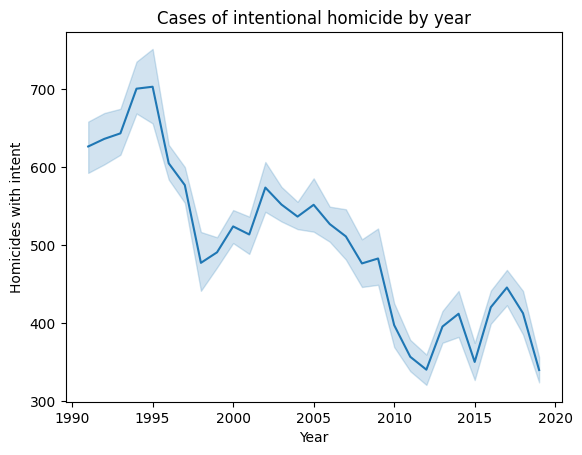

In [32]:
# checking cases of intentional homicide over time

sns.lineplot(data=df, x='year', y='intentional_homicide')

plt.title('Cases of intentional homicide by year')
plt.ylabel('Homicides with intent')
plt.xlabel('Year')
plt.show()

Looking at the graph above, we can see that the number of intentional homicides has fallen over time, which is a good sign! Between 2000 and 2010, homicides remained high, but fell towards the end of the decade. The following decade was marked by ups and downs.

Next, I'm going to repeat the same process to check the occurrences of rape, which is a very important issue to be debated and combated.

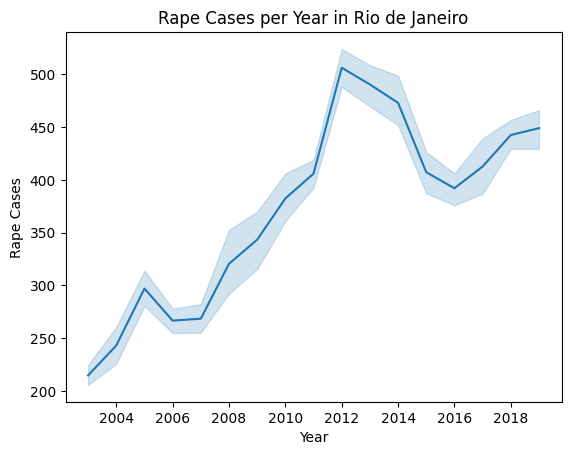

In [33]:
sns.lineplot(data=df, x="year", y="rape")

plt.title('Rape Cases per Year in Rio de Janeiro')
plt.ylabel('Rape Cases')
plt.xlabel('Year')
plt.show()

As can be seen in the graph above, rape cases hit a record high in 2012, fell in subsequent years and have been on the rise since 2016. This is important information, as the authorities need to rethink new public policies and reinforce campaigns to encourage the fight against rape, so that the curve decreases in the coming years.

In order to find out how safe the population is in Rio de Janeiro, I'm going to see how general thefts behaved in the years under study. To do this, I have the variable total_thefts, which represents the sum of all the types of theft under study (vehicle, trespassing, cell phone, collective, etc.).

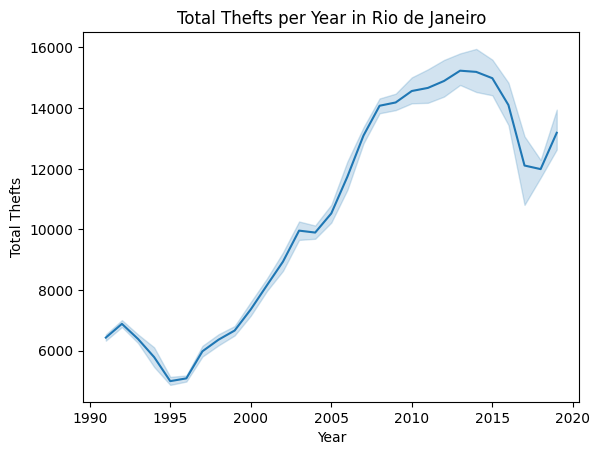

In [34]:
sns.lineplot(data=df, x="year", y="total_thefts")

plt.title('Total Thefts per Year in Rio de Janeiro')
plt.ylabel('Total Thefts')
plt.xlabel('Year')
plt.show()

It can be seen that overall theft cases have been on the rise since 1995, with high figures between 2010 and mid-2015. However, in the middle of the years 2015-2020, incidents began to rise again. This is a warning that public security in Rio de Janeiro is not doing well and the state government needs to turn its attention to this fact.

Another phenomenon to be studied is the disappearance of people. According to [Observatório do Terceiro Setor](https://observatorio3setor.org.br/noticias/perigo-ignorado-todos-os-dias-217-pessoas-desaparecem-no-brasil/), a third sector brazilian observatory, this is an overlooked danger, as 217 people go missing in Brazil every day. It is therefore necessary to keep an eye on the statistics relating to this fact.

Below, I'll look at the number of people who have gone missing each year since the last decade.

In [35]:
missing_people = df[df['year'] >= 2010].missing_persons.sum()

print("Missing persons in the last decade: ", missing_people)

Missing persons in the last decade:  53796.0


Now I'm going to check how many people have disappeared over the years.

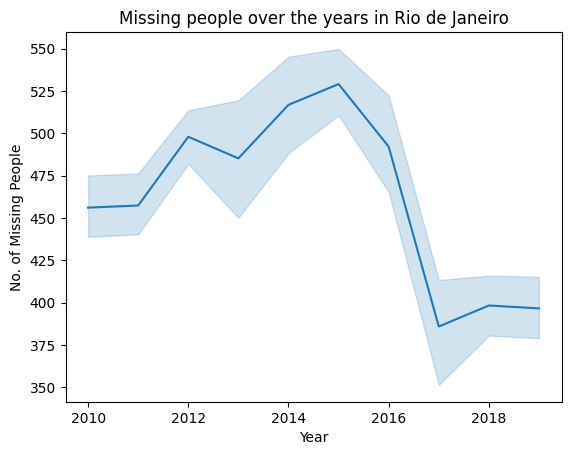

In [36]:
sns.lineplot(data=df[df["year"] >= 2010], x="year", y="missing_persons")

plt.title('Missing people over the years in Rio de Janeiro')
plt.ylabel('No. of Missing People')
plt.xlabel('Year')
plt.show()


It can be observed that the number of missing persons rose sharply from the beginning of the decade until 2015, when the highest number of cases occurred. Fortunately, this number fell dramatically in the second half of the decade.

Next, I will analyze the robbery_public_transport variable over time.

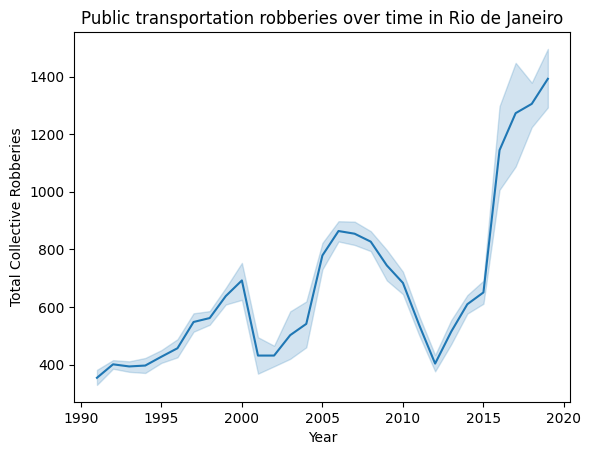

In [39]:
sns.lineplot(data=df, x="year", y="robbery_public_transport")

plt.title('Public transportation robberies over time in Rio de Janeiro')
plt.ylabel('Total Collective Robberies')
plt.xlabel('Year')
plt.show()

It can be concluded that collective robberies have been on the increase since mid-2013 and 2014. This is not a good sign, as it means that public security in the marvelous city is not doing well and it is important to emphasize the importance of the authorities paying attention to this.

Finally, I will look at the most frequent types of crime by category in Rio de Janeiro from the 2000s to the present day. These are: crimes against life, the most frequent types of robbery.

In [41]:
# Adding a line with the total number of crimes
df = pd.concat([df, df[df['year'] >= 2000].sum(numeric_only=True).to_frame().T], ignore_index=True)

In [42]:
df.tail()

,year,month,intentional_homicide,bodily_injury_resulting_in_death,robbery_resulting_in_death,homicides_by_police_intervention,attempted_homicide,intentional_bodily_injury,rape,involuntary_homicide,...,missing_persons,found_cadavers,found_human_remains,military_police_killed_on_duty,civil_police_killed_on_duty,lethality_indicator,street_robbery_indicator,vehicle_robbery_indicator,total_occurrences,operation_phase
340,2019.0,5.0,345.0,2.0,15.0,172.0,478.0,4958.0,465.0,145.0,...,390.0,20.0,1.0,0.0,0.0,534.0,11384.0,3649.0,68336.0,3.0
341,2019.0,6.0,332.0,3.0,8.0,153.0,436.0,4769.0,414.0,152.0,...,403.0,20.0,1.0,3.0,0.0,496.0,9551.0,3115.0,61202.0,3.0
342,2019.0,7.0,309.0,5.0,10.0,194.0,399.0,4740.0,402.0,140.0,...,400.0,32.0,7.0,0.0,0.0,518.0,10071.0,3198.0,65817.0,2.0
343,2019.0,8.0,318.0,1.0,6.0,170.0,457.0,4760.0,460.0,156.0,...,367.0,27.0,8.0,2.0,0.0,495.0,9912.0,3181.0,65285.0,2.0
344,474204.0,1518.0,108052.0,970.0,3651.0,18050.0,90589.0,1496914.0,73989.0,47070.0,...,92248.0,14694.0,700.0,417.0,68.0,130723.0,1474648.0,636334.0,12944113.0,706.0


First, I'll look at the most frequent types of crimes against life in Rio.

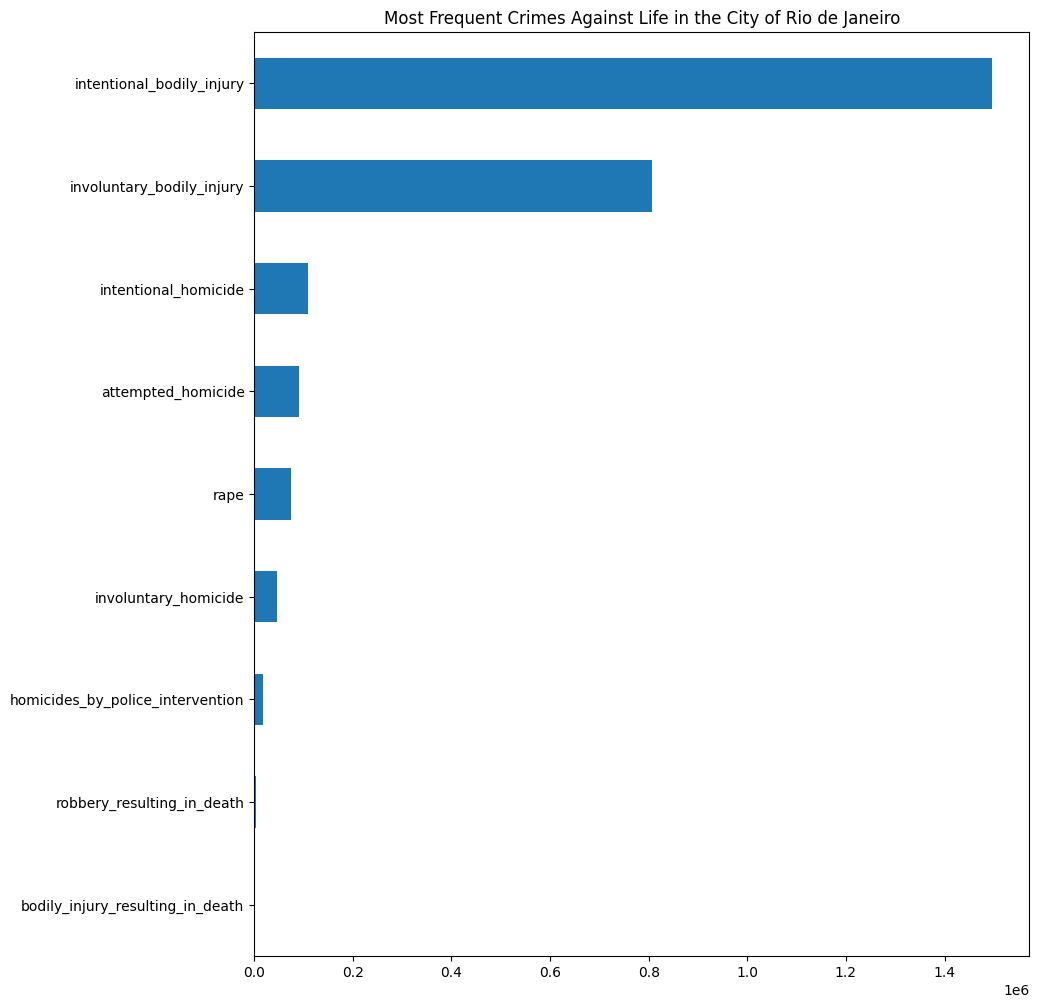

Check out the values:


,344
intentional_bodily_injury,1496914.0
involuntary_bodily_injury,807298.0
intentional_homicide,108052.0
attempted_homicide,90589.0
rape,73989.0
involuntary_homicide,47070.0
homicides_by_police_intervention,18050.0
robbery_resulting_in_death,3651.0
bodily_injury_resulting_in_death,970.0


In [43]:
df.iloc[344, 2:11].sort_values(ascending=True).plot.barh(figsize=(10,12))
plt.title("Most Frequent Crimes Against Life in the City of Rio de Janeiro")
plt.show()

print("Check out the values:")
df.iloc[344, 2:11].sort_values(ascending=False)

Intentional and involuntary bodily injury are the types of crime that contribute most to the increase in crime against life in the city of Rio de Janeiro, totaling more than 1 million of the felonious type and approximately 800,000 of the culpable type. We urgently need to think about solutions to this.

Next, I'll look at the most common types of robbery in the city of Rio de Janeiro.

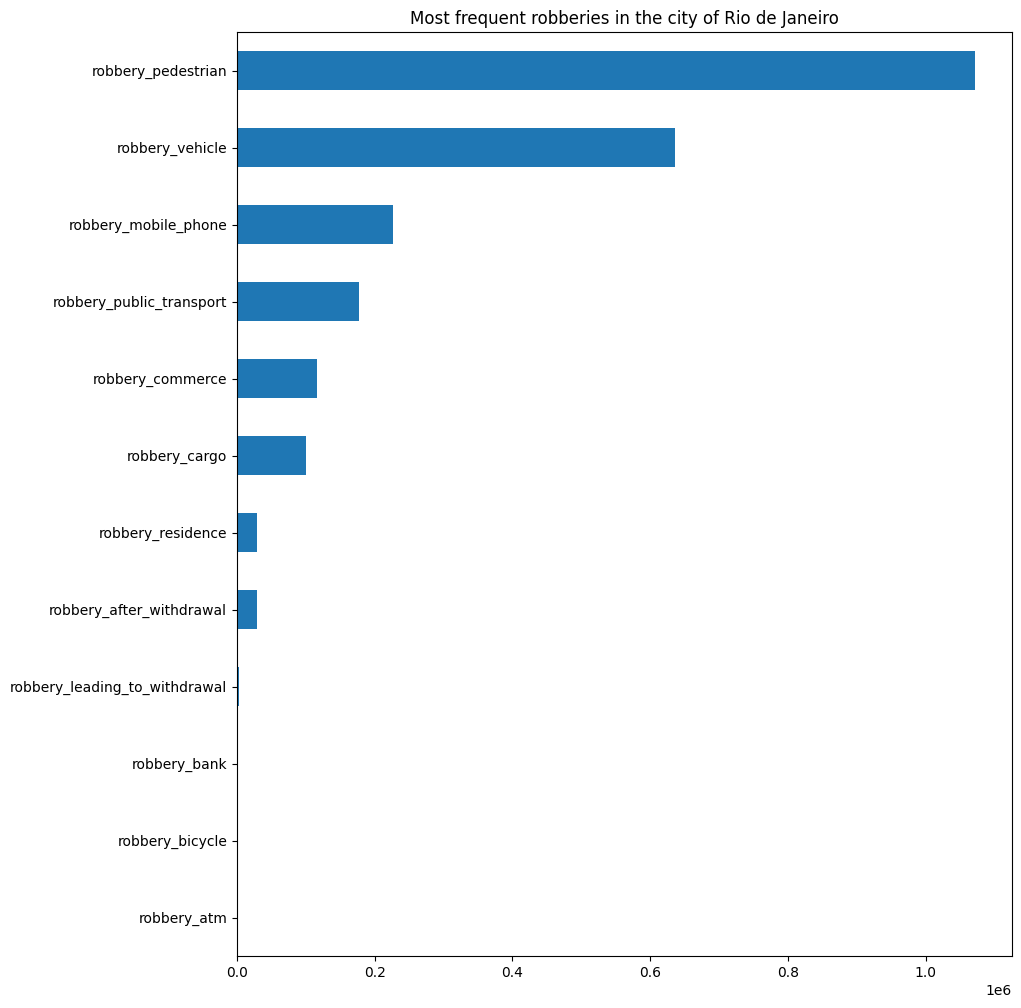

Check out the values:


,344
robbery_pedestrian,1071979.0
robbery_vehicle,636334.0
robbery_mobile_phone,226082.0
robbery_public_transport,176587.0
robbery_commerce,116806.0
robbery_cargo,100187.0
robbery_residence,29489.0
robbery_after_withdrawal,29133.0
robbery_leading_to_withdrawal,2264.0
robbery_bank,963.0


In [44]:
df.iloc[344, 11:23].sort_values(ascending=True).plot.barh(figsize=(10,12))
plt.title("Most frequent robberies in the city of Rio de Janeiro")
plt.show()

print("Check out the values:")
df.iloc[344, 11:23].sort_values(ascending=False)

Robbery by passers-by (a.k.a. pedestrian robbery) is the most frequent type of robbery in Rio de Janeiro since 2000, totaling more than one million robberies. It is necessary for the authorities to pay attention to this fact and work on policies that reinforce the safety of individuals while they are traveling on public roads.

Finally, I will look at the most common types of theft.

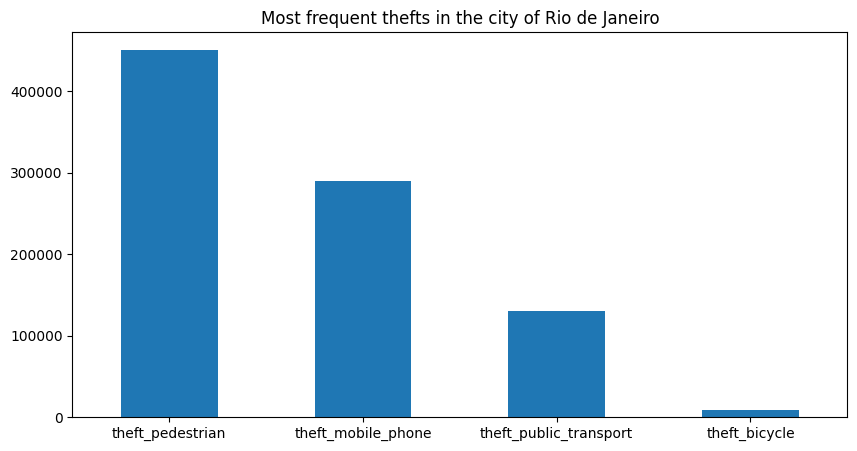

Check out the values:


,344
theft_pedestrian,449855.0
theft_mobile_phone,289835.0
theft_public_transport,130046.0
theft_bicycle,8487.0


In [45]:
df.iloc[344, 26:30].sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.title("Most frequent thefts in the city of Rio de Janeiro")
plt.xticks(rotation=0)
plt.show()

print("Check out the values:")
df.iloc[344, 26:30].sort_values(ascending=False)

Theft by passers-by (pedestrian) and theft of cell phones are the most frequent types of theft in the marvelous city since 2000. Thefts from passers-by amount to almost half a million, while thefts of cell phones amount to around 290,000. It is therefore worth emphasizing once again that we need to rethink the security of citizens who travel through Rio.

## Conclusion

It can therefore be concluded that data analysis is extremely important for a more assertive, important and publicly relevant study, which is the case with crime in Rio de Janeiro. Through it, it is possible to obtain a lot of valuable information from the data and help in the fight against violence and crime, alerting us to worrying cases and proposing possible paths that will lead to a solution for the authorities and bring security to the population of Rio de Janeiro.

As challenges for future projects, a study could be carried out using time series techniques to predict cases of violence against property and against life for the coming months or years. In this way, it will be possible to help the authorities make even more assertive decisions regarding new public policies that value the lives of the population.